In [1]:
# import libraries 
library(ggplot2)
library(tidyr)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# The Fangs of Immunity: Resilience of the Shark Immune System

In [2]:
sharks = read.table("datasets/shark_immunity.txt", header = TRUE, sep = "\t")

## Understanding the Dataset

### Overview of the Dataset

In [3]:
sprintf("%d entries, %d categories", nrow(sharks), ncol(sharks)-1)
names(sharks)

[1] "1345 entries, 17 categories"

[1] "ID"                        "physiological_condition"  
 [3] "immune_cell_type"          "Gene_A_expression"        
 [5] "Gene_B_expression"         "Gene_C_expression"        
 [7] "Gene_D_expression"         "Gene_E_expression"        
 [9] "Gene_F_expression"         "regeneration_capacity"    
[11] "age_years"                 "immune_receptor_diversity"
[13] "response_to_infection"     "inflammation_level"       
[15] "weight_kg"                 "habitat_location"         
[17] "resilience_score"          "reproduction_rate"

Values for Qualitative Categories

In [4]:
unique(sharks$physiological_condition)
unique(sharks$immune_cell_type)
unique(sharks$habitat_location)

[1] "Infected"   "Injured"    "Healthy"    "Stressed"   "Recovering"

[1] "Monocytes"       "Dendritic_cells" "T_cells"         "NK_cells"       
[5] "B_cells"         "Macrophages"

[1] "Indian"   "Southern" "Arctic"   "Pacific"  "Atlantic"

### Overview of Each Category

In [5]:
table(sharks$physiological_condition)


   Healthy   Infected    Injured Recovering   Stressed 
       387        333        271        153        201 

In [6]:
table(sharks$immune_cell_type)


        B_cells Dendritic_cells     Macrophages       Monocytes        NK_cells 
            284             155             139             187             256 
        T_cells 
            324 

In [7]:
summary(sharks[4:9])

 Gene_A_expression Gene_B_expression Gene_C_expression Gene_D_expression
 Min.   : 45.20    Min.   : 32.75    Min.   : 67.05    Min.   : 42.13   
 1st Qu.: 78.16    1st Qu.: 75.73    1st Qu.: 97.93    1st Qu.: 83.62   
 Median : 96.29    Median :106.06    Median :109.63    Median :101.09   
 Mean   :102.87    Mean   :110.53    Mean   :119.42    Mean   :110.17   
 3rd Qu.:126.66    3rd Qu.:134.58    3rd Qu.:139.72    3rd Qu.:131.79   
 Max.   :175.39    Max.   :194.24    Max.   :191.41    Max.   :194.71   
 Gene_E_expression Gene_F_expression
 Min.   : 69.62    Min.   : 50.17   
 1st Qu.:104.80    1st Qu.: 88.10   
 Median :127.16    Median :109.16   
 Mean   :135.18    Mean   :125.73   
 3rd Qu.:167.90    3rd Qu.:168.12   
 Max.   :211.41    Max.   :218.87   

| Gene | Min | Mean | Max |
| :-: | :-: | :-: | :-: |
| A | 45.20 | 96.29 | 175.39 |
| B | 32.75 | 110.53 | 194.24 |
| C | 67.05 | 119.42 | 191.41 |
| D | 42.13 | 110.17 | 194.71 |
| E | 69.62 | 135.18 | 211.41 |
| F | 50.17 | 125.73 | 218.87 |

see the expression level for...
- each immune cell type
- physiological condition
- an immune cell type in a physiological condition

In [8]:
summary(sharks$regeneration_capacity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   83.2   110.3   119.9   119.0   128.0   151.9 

In [9]:
summary(sharks$age_years)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   19.00   33.00   32.91   47.00   60.00 

In [10]:
summary(sharks$immune_receptor_diversity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   44.9    63.2    73.5    73.4    82.3   102.7 

In [11]:
summary(sharks$response_to_infection)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.20   68.60   76.80   77.85   86.30  118.30 

In [12]:
summary(sharks$inflammation_level)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.80   22.90   26.10   35.97   30.90  122.90 

In [13]:
summary(sharks$weight_kg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  276.2   455.7   497.0   498.1   541.3   679.7 

In [14]:
table(sharks$habitat_location)


  Arctic Atlantic   Indian  Pacific Southern 
     263      278      291      257      256 

In [15]:
summary(sharks$resilience_score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   98.9   118.7   126.9   128.6   136.6   174.1 

In [16]:
summary(sharks$reproduction_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.90   10.90   12.30   14.86   20.90   25.00 

### Possible Initial Strategy 

1. find relationship (if there is one) between the physiological condition, immune cell type, and gene expression
    - composition of immune cell types for each physiological condition
    - gene expressions for each immune cell type
    - gene expressions for each physiological condition
    - gene expressions for each immune cell type for a physiological condition
2. find relationship between each numerical category and the main 3 categories 

## Analysis

### Relationship Between Physiological Conditions, Immune Cell Types, Gene Expressions

#### Immune Cell Type Composition for Physiological Conditions

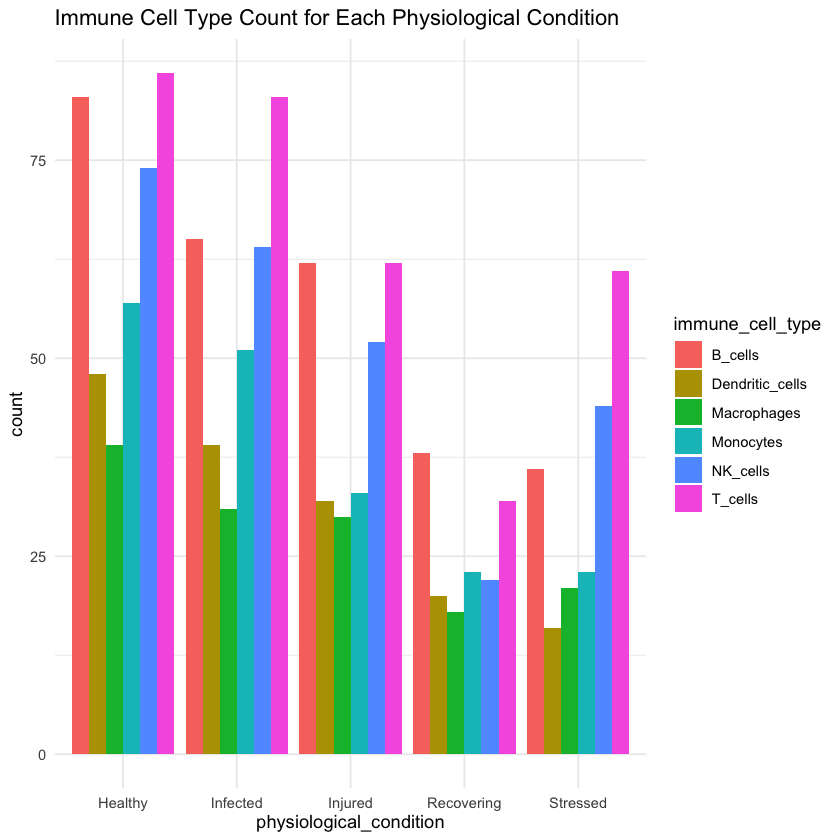

In [17]:
ggplot(sharks, aes(x=physiological_condition, fill=immune_cell_type)) +
    geom_bar(position="dodge") +
    theme_minimal() +
    ggtitle("Immune Cell Type Count for Each Physiological Condition")

Finding the percentage of each cell type for each physiological condition would give us the cell type composition for that condition. The different compositions might allow us to determine which cell type and in what quantities distinguish one physiological condition from another.

Additionally, getting the cell type composition allows us to normalize the cell counts.

_Notice below how the total number of cells for every physiological condition is less than the total for the healthy condition._

In [18]:
# get the cell counts for each cell type for each physiological condition
cell_counts = sharks %>% 
    count(physiological_condition, immune_cell_type)

# get the total cell count for each physiological condition
total_cell_counts = cell_counts %>%
    group_by(physiological_condition) %>%
    summarise(total_nb = sum(n, na.rm = TRUE))
total_cell_counts

physiological_condition,total_nb
<chr>,<int>
Healthy,387
Infected,333
Injured,271
Recovering,153
Stressed,201


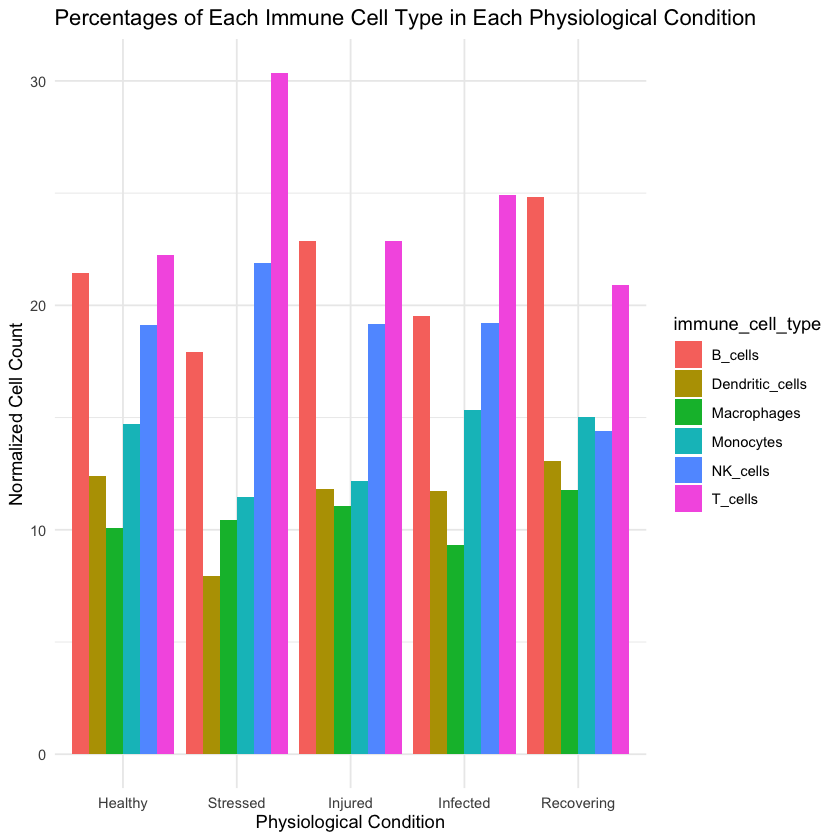

In [19]:
# get percentage of each cell type for each physiological condition
cell_type_percentages = cell_counts %>% 
    left_join(total_cell_counts, by="physiological_condition") %>%
    mutate(percent = 100 * n / total_nb)

# change order of physiological conditions on the x-axis 
cell_type_percentages$physiological_condition <- factor(
  cell_type_percentages$physiological_condition,
  levels = c("Healthy", "Stressed", "Injured", "Infected", "Recovering")
)

# plot percentages (side by side)
ggplot(cell_type_percentages, aes(x=physiological_condition, y=percent, fill=immune_cell_type)) +
    geom_bar(stat="identity", position="dodge") +
    theme_minimal() +
    ggtitle("Percentages of Each Immune Cell Type in Each Physiological Condition") +
    xlab("Physiological Condition") +
    ylab("Normalized Cell Count")

Now that we have the cell type composition for each physiological condition, we can normalize them by the healthy condition. Comparing them to the healthy condition, the control in this case, will reveal the possible determining differences, whether they be an increase or a decrease in quantity.

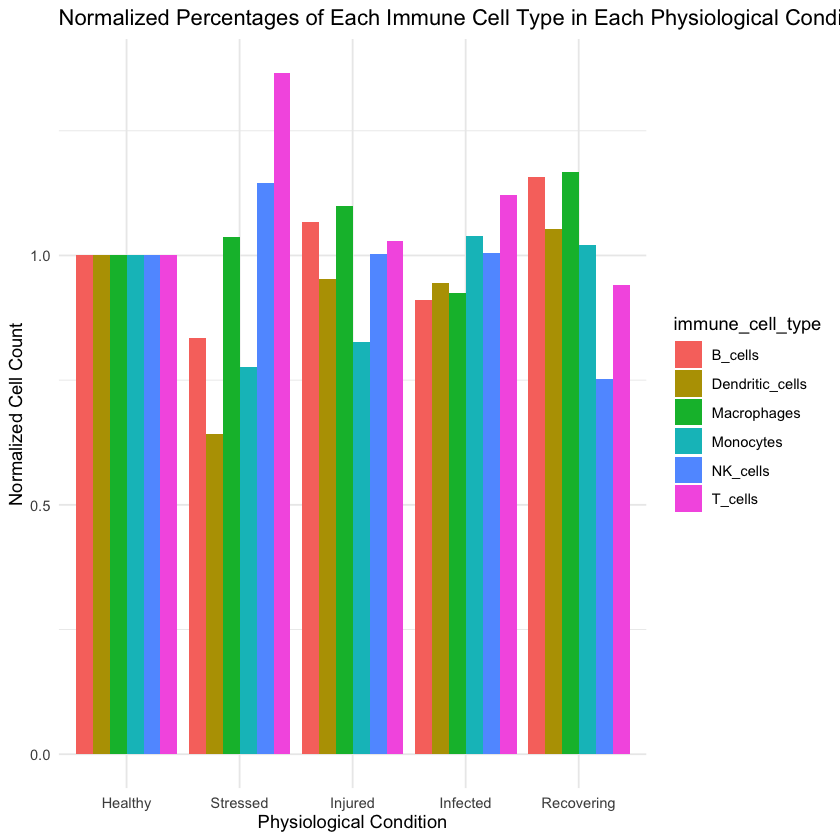

In [20]:
# normalize percentages
norm_cell_type_percentages = cell_type_percentages %>%
    group_by(immune_cell_type) %>%
    mutate(norm_percent = percent/percent[physiological_condition == "Healthy"])

# plot normalized percentages (side by side)
ggplot(norm_cell_type_percentages, aes(x=physiological_condition, y=norm_percent, fill=immune_cell_type)) +
    geom_bar(stat="identity", position="dodge") +
    theme_minimal() +
    ggtitle("Normalized Percentages of Each Immune Cell Type in Each Physiological Condition") +
    xlab("Physiological Condition") +
    ylab("Normalized Cell Count")

Apparent Variations 
| Condition | B Cells | Dendritic Cells | Macrophages | Monocytes | NK Cells | T Cells |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Stressed | -- | --- | + | -- | + | +++ |
| Injured | + | - | + | - | = | + |
| Infected | - | - | - | + | = | + |
| Recovering | + | + | + | + | -- | - |

Interestingly, it seems that the stressed condition has the greatest apparent variation in quantities compared to the healthy condition. Additionally, it also seems that the percentage of NK Cells does not change from the healthy condition to the injured or infected conditions.

Perhaps logically, the recovering condition's values seem to vary in directions opposite to the other conditions' variations.

#### Gene Expression for Physiological Conditions and Immune Cell Types

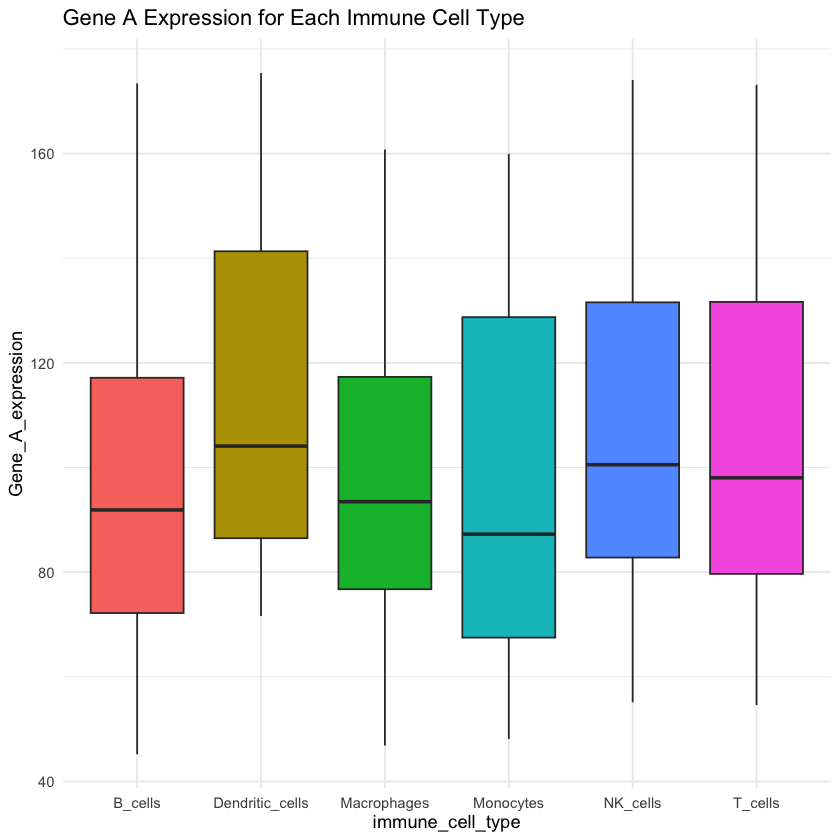

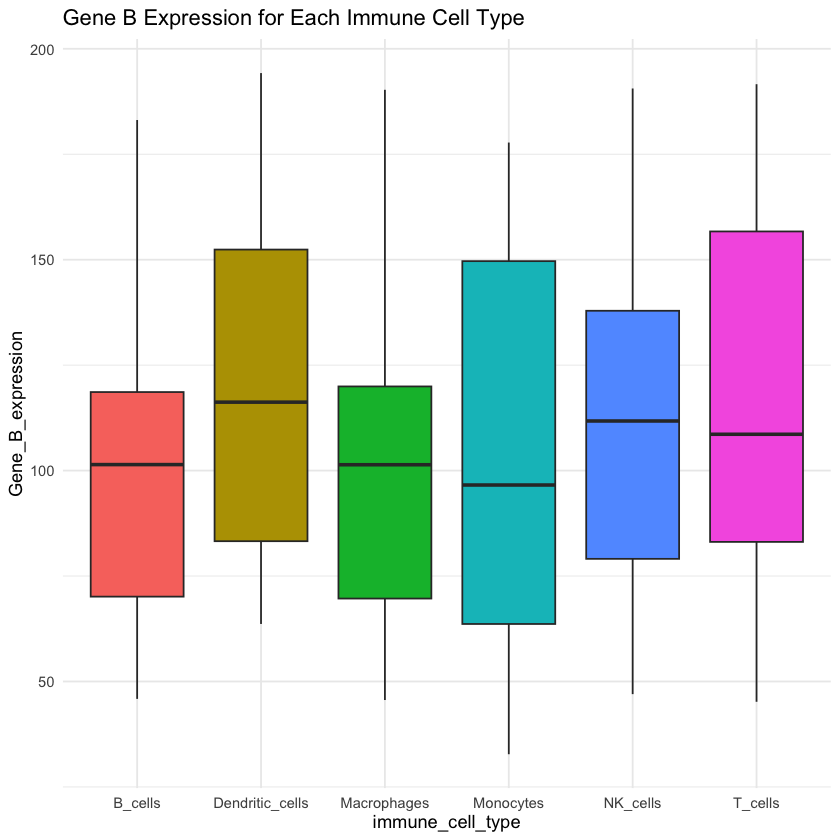

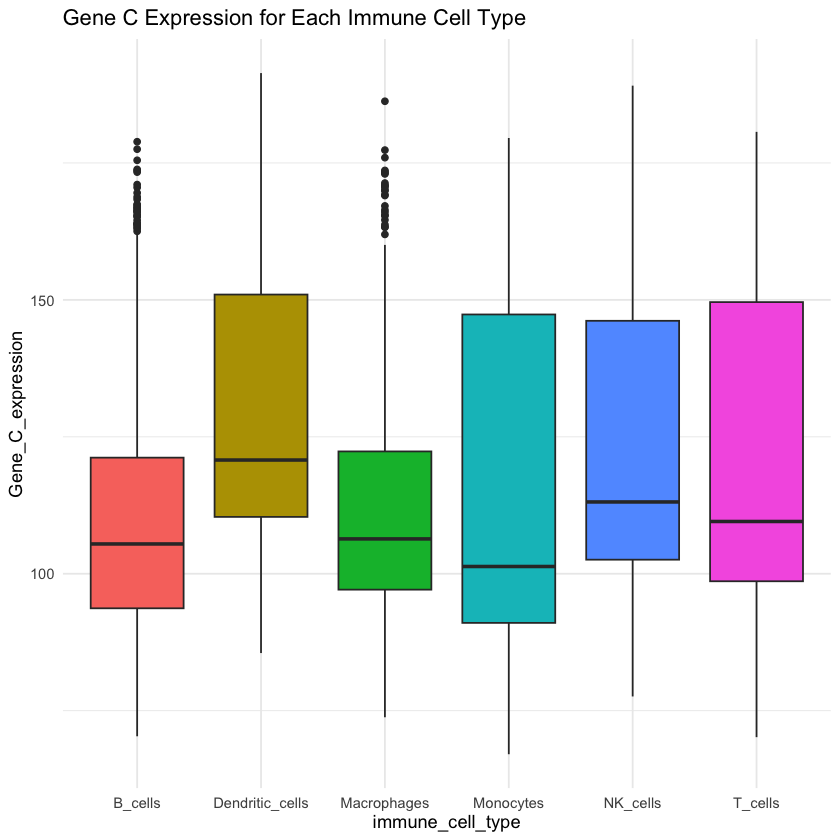

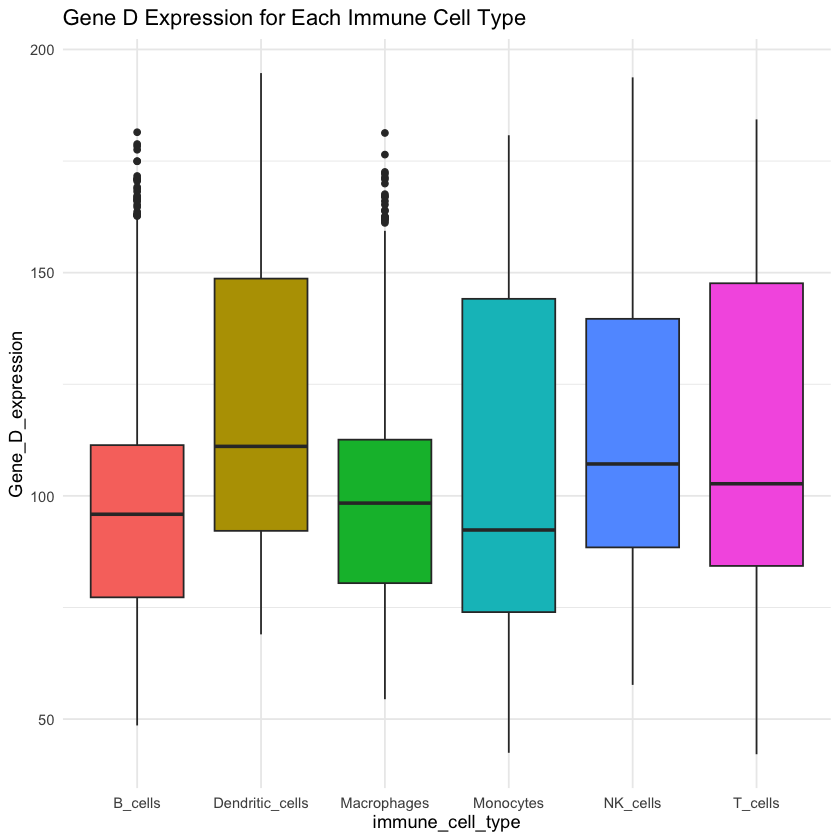

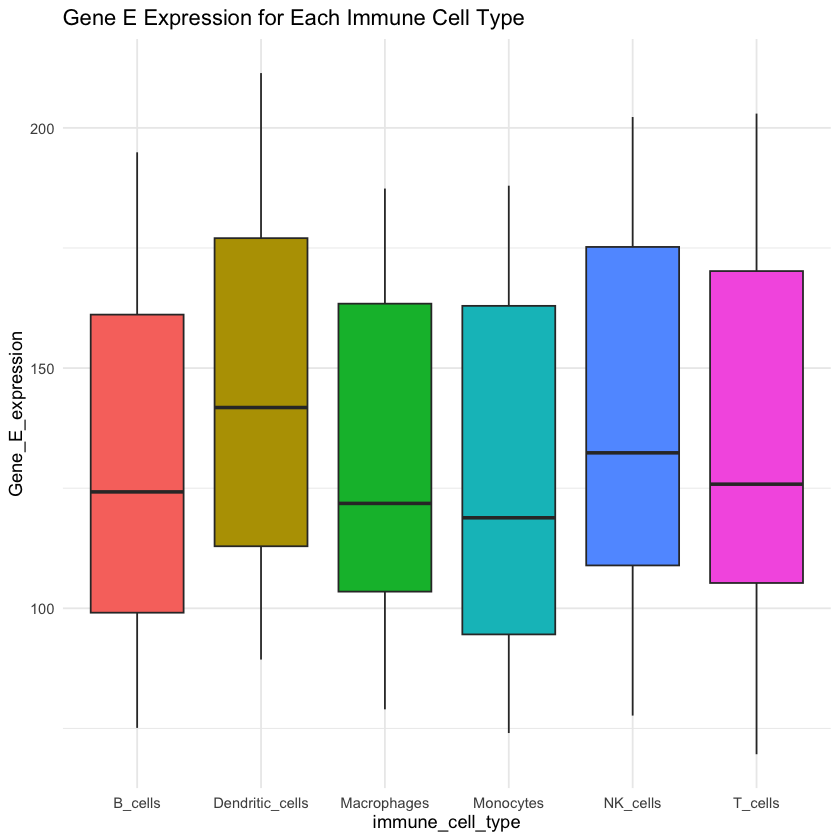

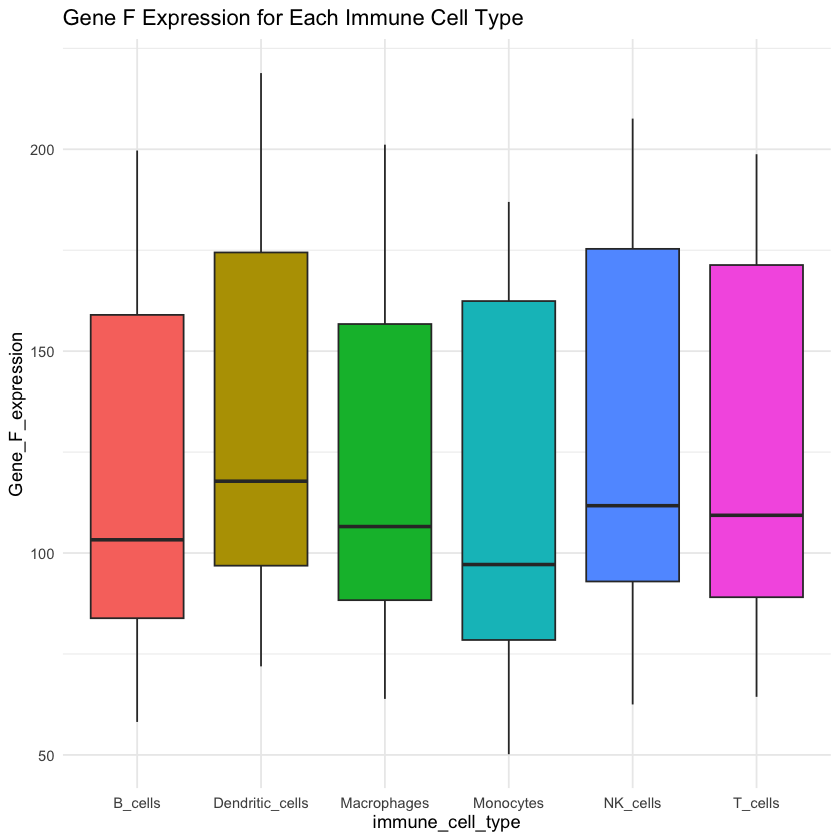

In [21]:
# (?) delete
ggplot(sharks, aes(x=immune_cell_type, y=Gene_A_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene A Expression for Each Immune Cell Type")

ggplot(sharks, aes(x=immune_cell_type, y=Gene_B_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene B Expression for Each Immune Cell Type")

ggplot(sharks, aes(x=immune_cell_type, y=Gene_C_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene C Expression for Each Immune Cell Type")

ggplot(sharks, aes(x=immune_cell_type, y=Gene_D_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene D Expression for Each Immune Cell Type")

ggplot(sharks, aes(x=immune_cell_type, y=Gene_E_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene E Expression for Each Immune Cell Type")

ggplot(sharks, aes(x=immune_cell_type, y=Gene_F_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene F Expression for Each Immune Cell Type")

In [22]:
sharks_gene_expr_split = sharks %>% 
    pivot_longer(
        cols = starts_with("Gene_"),
        names_to = "gene",
        values_to = "expression"
    )

# reduce name to Gene_X 
sharks_gene_expr_split$gene <- gsub("_expression", "", sharks_gene_expr_split$gene)

# change order of physiological conditions on the x-axis 
sharks_gene_expr_split$physiological_condition <- factor(
  sharks_gene_expr_split$physiological_condition,
  levels = c("Healthy", "Stressed", "Injured", "Infected", "Recovering")
)

I first wanted to see the gene expression profile for each cell type.

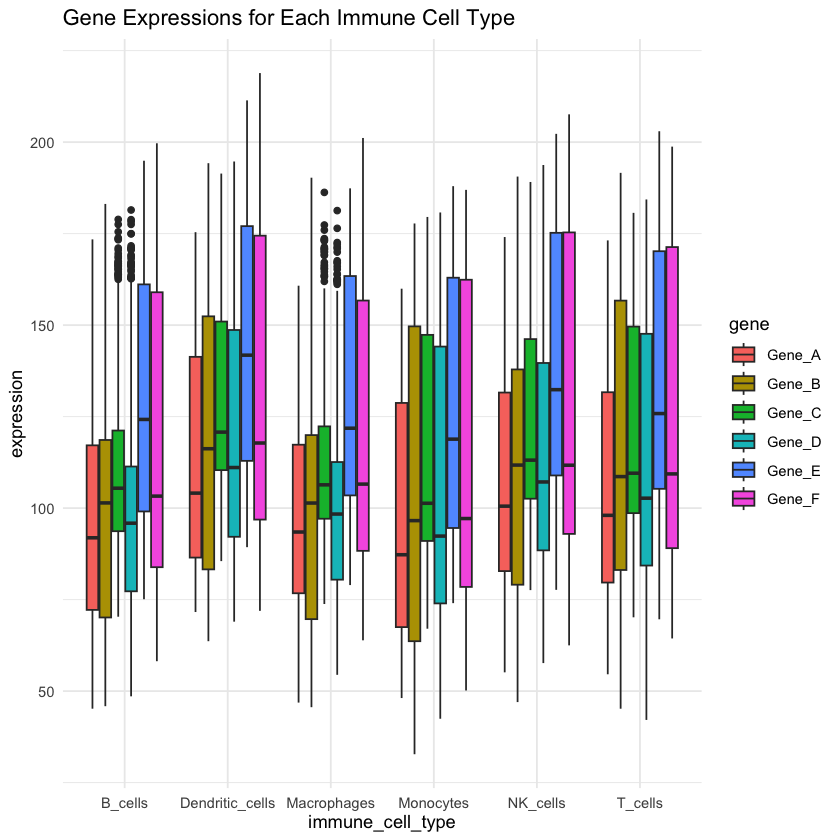

In [23]:
ggplot(sharks_gene_expr_split, aes(x=immune_cell_type, y=expression, fill=gene)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Gene Expressions for Each Immune Cell Type")

But as the gene expression profiles for each cell type seemed to be similar, I then wanted to see the gene expression profile for each physiological condition. 

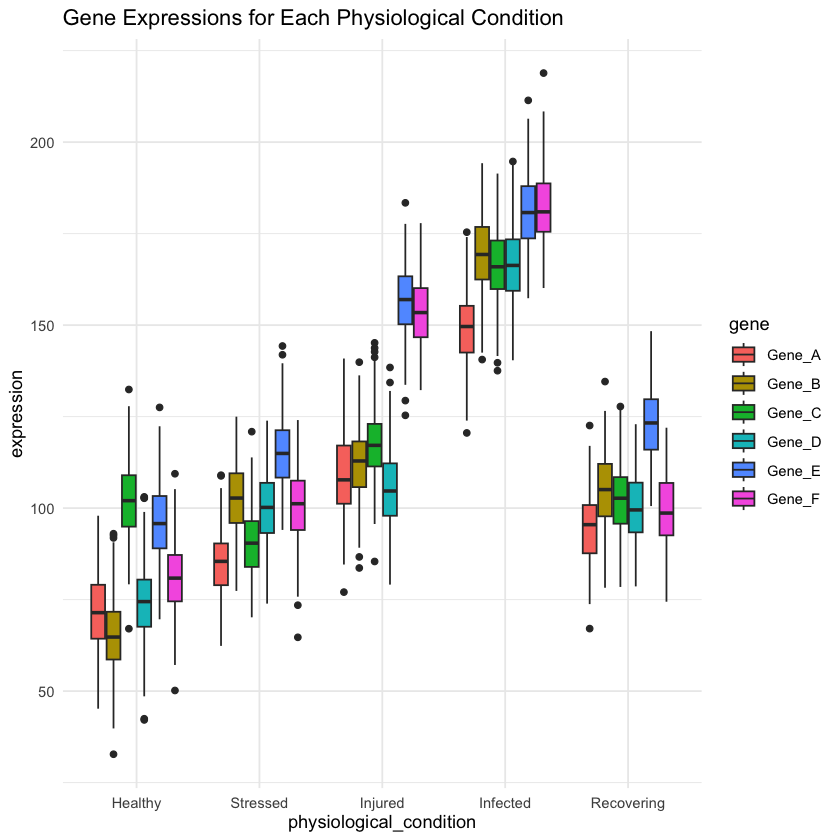

In [24]:
ggplot(sharks_gene_expr_split, aes(x=physiological_condition, y=expression, fill=gene)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Gene Expressions for Each Physiological Condition")

In the previous section `Immune Cell Type Composition for Physiological Conditions`, we saw that the each physiological condition corresponded to a variation in the quantity of each cell type. Logically speaking, these variations would be driven by the varying levels of gene expressions demonstrated by the graph. 

Perhaps the previous two approaches were too simplistic and it would be better to look at the gene expression for each immune cell type in a certain physiological condition.

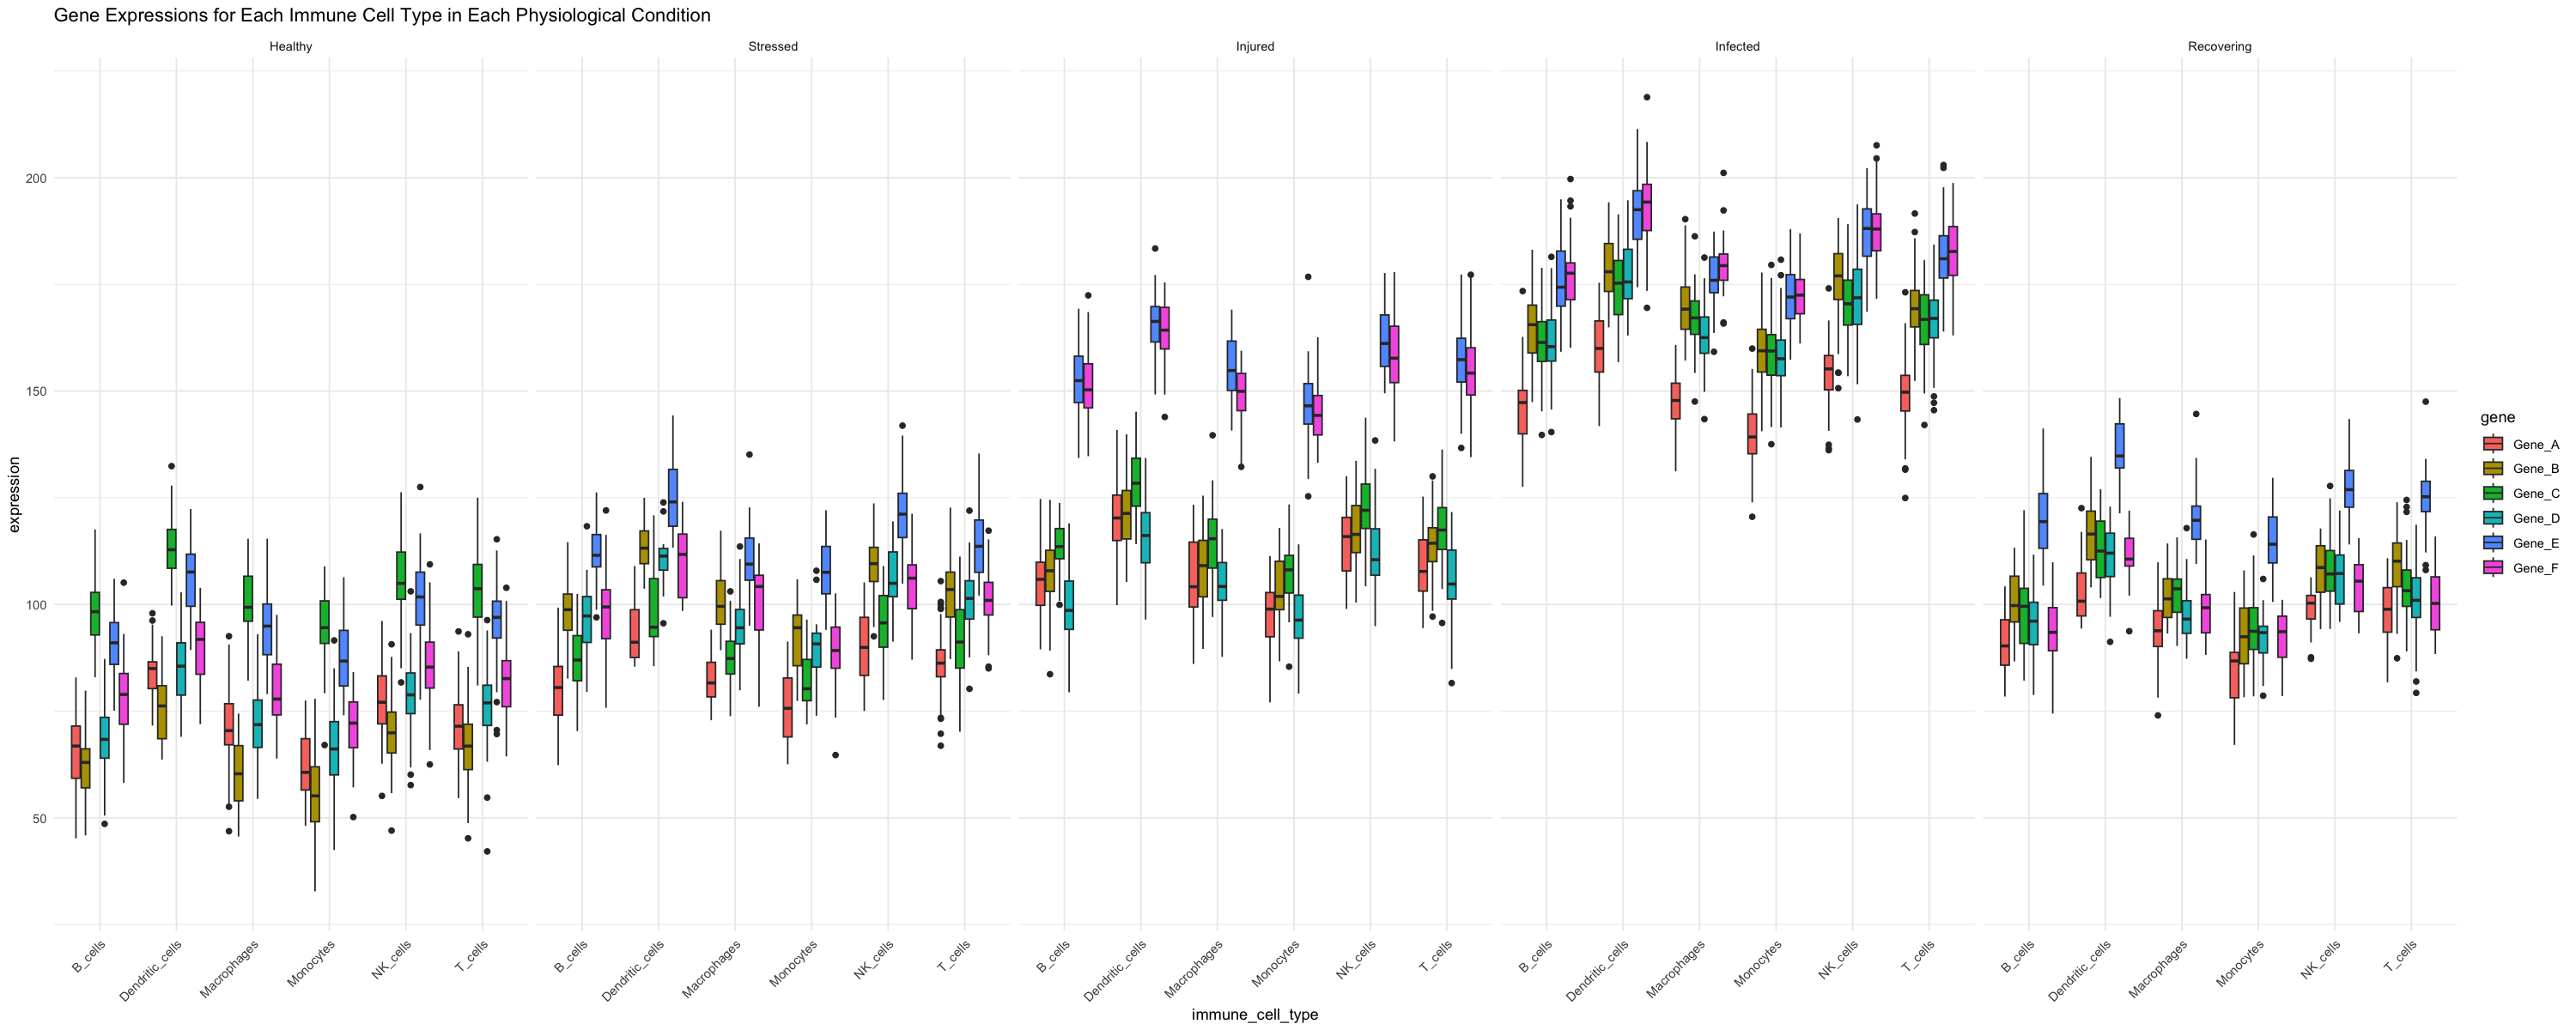

In [43]:
options(repr.plot.width=25, repr.plot.height=10)

ggplot(sharks_gene_expr_split, aes(x=immune_cell_type, y=expression, fill=gene)) +
    geom_boxplot() +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle=45, hjust=1)) +
    ggtitle("Gene Expressions for Each Immune Cell Type in Each Physiological Condition")

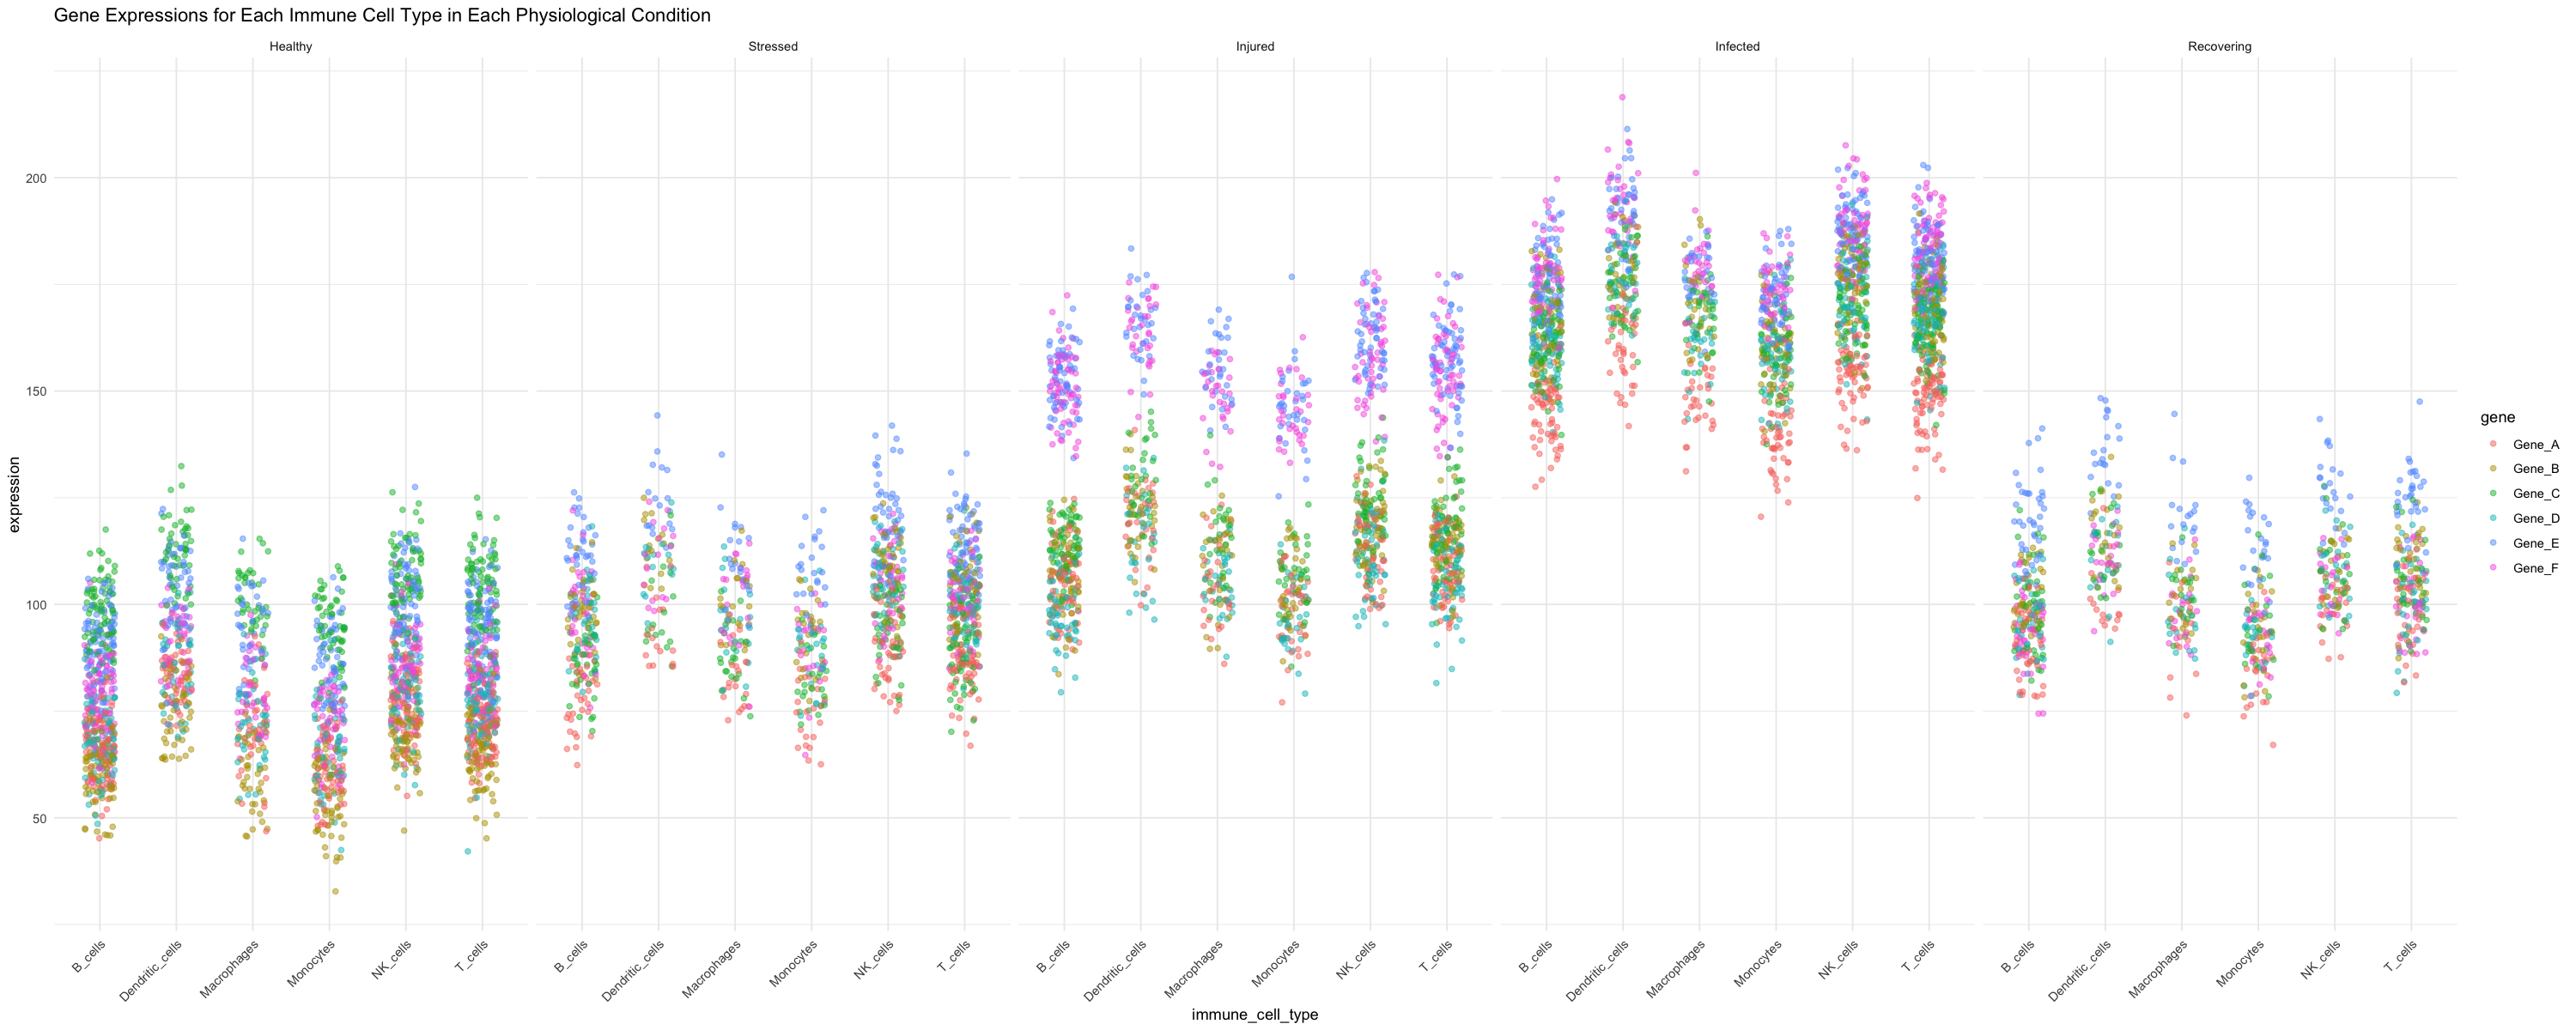

In [41]:
ggplot(sharks_gene_expr_split, aes(x=immune_cell_type, y=expression, fill=gene)) +
    geom_jitter(aes(color=gene), width=0.2, alpha=0.5) +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle=45, hjust=1)) +
    ggtitle("Gene Expressions for Each Immune Cell Type in Each Physiological Condition")